In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score , classification_report , roc_curve , auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS2_C5_S4_HR_Data_Challenge.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


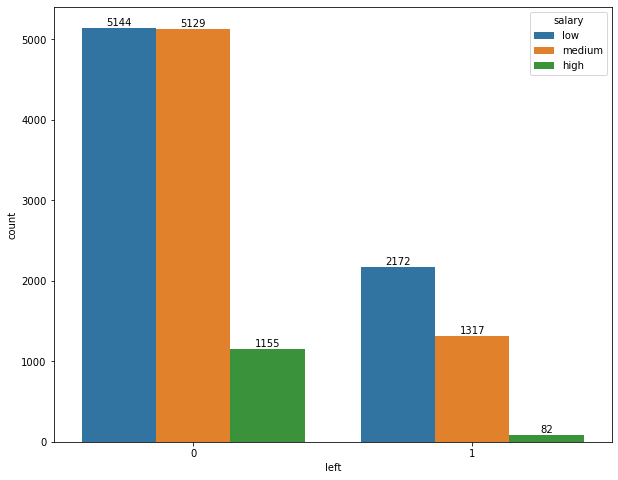

In [3]:
# task 1
# a

plt.figure(figsize=(10,8))
a = sns.countplot(df['left'], hue=df['salary'])
for bar in a.patches:
    percentage = bar.get_height()
    x = bar.get_x()+bar.get_width()/2
    y = bar.get_height()
    a.annotate(percentage,(x,y),va="bottom",ha="center")

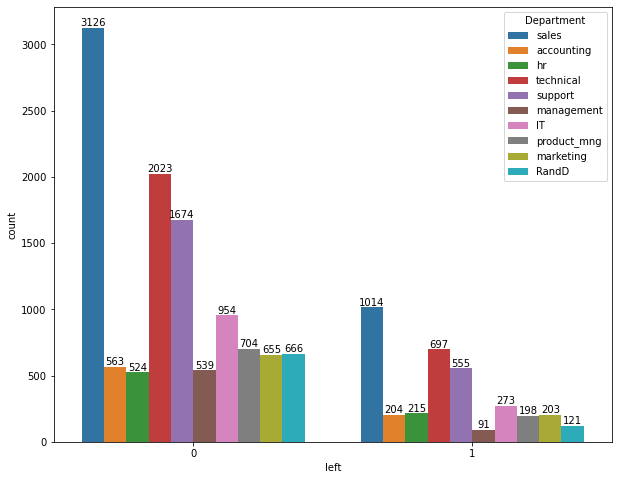

In [4]:
# b

plt.figure(figsize=(10,8))
a = sns.countplot(x='left',hue='Department',data=df)

for bar in a.patches:
    val = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    a.annotate(val,(x,y),va = 'bottom' , ha = 'center')

In [5]:
# task 2
# a

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
# b

df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


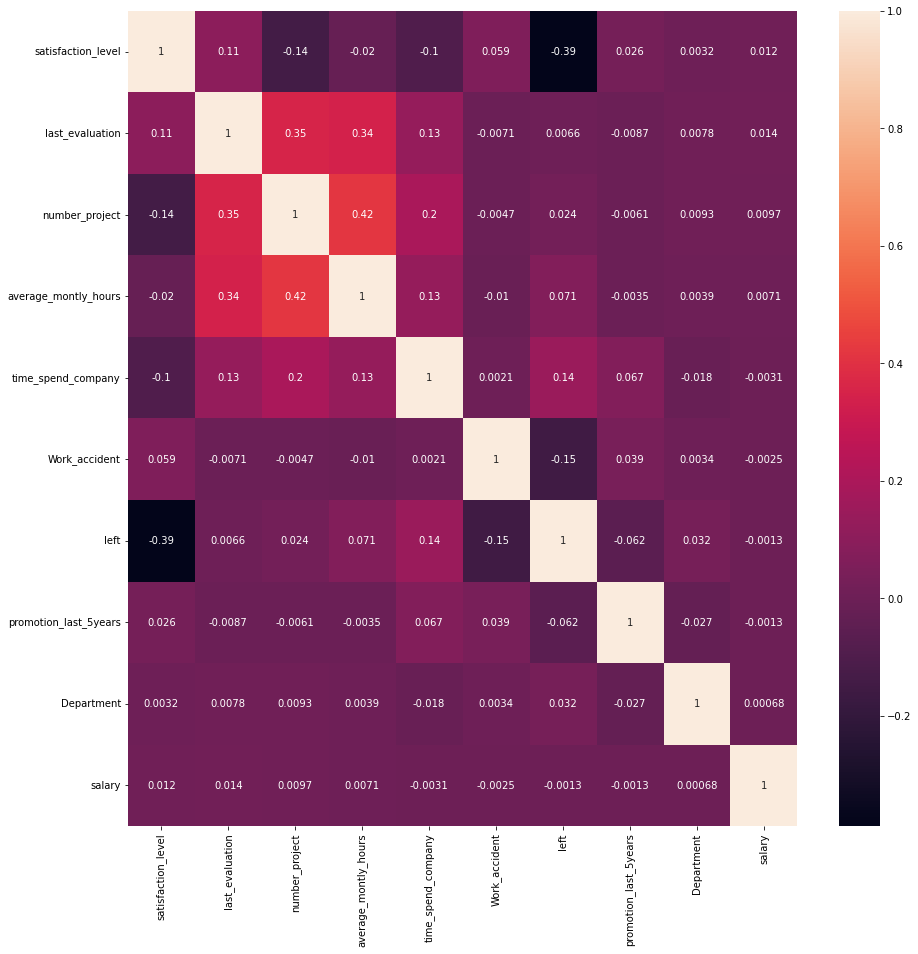

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

In [9]:
# c

from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
cols = ['salary','Department']
for i in cols:
    df[i] = label_encoder.fit_transform(df[i])

In [12]:
# d

Y=df['left']  
X=df.drop(columns='left',axis=1) 
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=1)

In [13]:
# task 3

sc = StandardScaler() 
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [14]:
classifier = GaussianNB() 
classifier.fit(x_train, y_train) 

GaussianNB()

In [16]:
y_pred = classifier.predict(x_test) 
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
classifier.score(x_train,y_train)

0.7822649776169159

In [17]:
accuracy_score(y_test, y_pred)

0.7782222222222223

In [26]:
# task 4

# a
y=df['left']  
x=df.drop(columns='left',axis=1) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [27]:
# b

classifier.score(X_train,y_train)

0.23687970282884085

In [28]:
# c

accuracy_score(y_test, y_pred)

0.9517777777777777

In [52]:
# task 5
# a
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.9517777777777777
recall: 0.9517777777777777
f1-score: 0.9519786959690447
precision: 0.8901890189018902


In [45]:
#b
fpr1 , tpr1 , threshold1 = roc_curve(y_test , DecisionTreeClassifier().fit(x_train, y_train).predict_proba(x_test)[:,1])
dauc = auc(fpr1 , tpr1)
dauc

0.9677823915241494

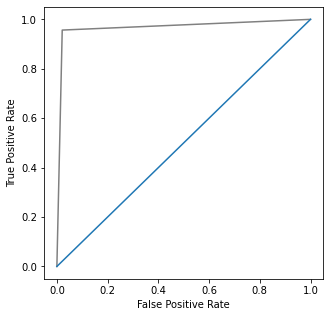

In [57]:
# c
plt.figure(figsize=(5,5))
plt.plot(fpr1 , tpr1 , label = "Decision Tree Classifier ", color = 'grey')
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');